In [5]:
from functools import reduce

a = [1,2,3,4,10,1,1,1]
reduce(lambda x,y: max(x,y), a)

10

In [1]:
import tensorflow as tf
import tensorflow.keras as keras

tf.__version__

'2.8.0'

In [2]:
# check whether GPU can be accessed 
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

def PlotModelEval(Model, History, X, Y, Labels):
    
    # Scores for each class (can be interpreted as probabilities since we use softmax output)
    S = Model.predict(X)
    # Prediction (class number) for each test image
    P = np.expand_dims(np.argmax(S,axis=1), axis=-1)
    # Calculate confusion matrix
    CM = confusion_matrix(Y,P)
    
    # Plot training history
    plt.figure(figsize=(16,6))
    plt.subplot(2,2,1)
    plt.semilogy(History.history['loss'], label="Training")
    if 'val_loss' in History.history:
        plt.semilogy(History.history['val_loss'], label="Validation")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.grid(True, which="both")
    plt.subplot(2,2,3)
    plt.plot(100 * np.array(History.history['accuracy']), label="Training")
    if 'val_accuracy' in History.history:
        plt.plot(100 * np.array(History.history['val_accuracy']), label="Validation")
    plt.title('Model accuracy')
    plt.ylabel('Acc [%]')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')
    plt.grid(True, which="both")
    
    # Plot confusion matrix
    plt.subplot(2,2,(2,4)) # assign plot to both slots
    PlotConfusionMatrix(CM, classes=Labels, title="Confusion matrix (test)")
    plt.show()

# ============================================================================

def PlotConfusionMatrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues,
                        showAcc=True):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            verticalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    if showAcc:
        acc = 100*(np.trace(cm) / np.sum(cm))
        title = title + " | Acc=%.2f%%" % acc
        
    plt.title(title)

# ============================================================================

cifar_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
import numpy as np
from tensorflow.keras.datasets import cifar10

cifar_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
from tensorflow.keras.utils import to_categorical

# Transform label indices to one-hot encoded vectors
y_train_c = to_categorical(y_train, num_classes=10)
y_test_c  = to_categorical(y_test , num_classes=10)

# Normalization of pixel values (to [0-1] range)
X_train = X_train.astype('float32') / 255
X_test  = X_test.astype('float32')  / 255

### First model

In [ ]:
import datetime
%load_ext tensorboard
log_folder = 'logs'
!rm -rf /logs/
log_folder = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
from tensorflow.keras.callbacks import TensorBoard

callbacks = [TensorBoard(log_dir=log_folder,
                         histogram_freq=1,
                         update_freq="batch")]

In [ ]:
from tensorflow.keras.optimizers import SGD, Nadam
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import Model

x_in = Input(shape=X_train.shape[1:])
x = Flatten()(x_in)
x = BatchNormalization()(x)

x = Dropout(rate=0.4)(x)
x = Dense(300, activation = "elu", kernel_initializer="lecun_uniform")(x)
x = BatchNormalization()(x)
x = Dropout(rate=0.3)(x)
x = Dense(100, activation = "elu", kernel_initializer="lecun_uniform")(x)
x = BatchNormalization()(x)

x = Dropout(rate=0.2)(x)
x = Dense(10, activation = "softmax", kernel_initializer="lecun_uniform")(x)


model = Model(inputs=x_in, outputs=x)

# Now we build the model using Stochastic Gradient Descent with Nesterov momentum. We use accuracy as the metric.
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
nadam_opt = Nadam()
model.compile(optimizer=nadam_opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary(100)

In [ ]:
history = model.fit(X_train,y_train_c, epochs=7, batch_size=32, verbose=1, validation_split=0.2, callbacks = callbacks) # verbose: info during training

In [ ]:
model.predict(X_Test)

In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization, Activation
from tensorflow.keras.regularizers import l2



x_in = Input(shape=X_train.shape[1:])

# === Add your code here ===
weight_decay = 1e-4
x = Conv2D(32, 3, kernel_regularizer=l2(weight_decay), padding="same", activation=None)(x_in)
x = Activation("elu")(x)
x = BatchNormalization()(x)
x = Conv2D(32, 3, kernel_regularizer=l2(weight_decay), padding="same", activation=None)(x)
x = Activation("elu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2)(x)
x = Dropout(0.2)(x)


x = Conv2D(64, 3, kernel_regularizer=l2(weight_decay), padding="same", activation=None)(x)
x = Activation("elu")(x)
x = BatchNormalization()(x)
x = Conv2D(64, 3, kernel_regularizer=l2(weight_decay), padding="same", activation=None)(x)
x = Activation("elu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2)(x)
x = Dropout(0.3)(x)




x = Conv2D(128, 3, kernel_regularizer=l2(weight_decay), padding="same", activation=None)(x)
x = Activation("elu")(x)
x = BatchNormalization()(x)
x = Conv2D(128, 3, kernel_regularizer=l2(weight_decay), padding="same", activation=None)(x)
x = Activation("elu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2)(x)
x = Dropout(0.4)(x)



x = Flatten()(x)
x = Dense(10, activation = "softmax")(x)


model_simple = Model(inputs=x_in, outputs=x)

# Compile model
#sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
opt_rms = keras.optimizers.RMSprop(lr=0.001,decay=1e-6)
model_simple.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt_rms)
model_simple.summary(100)

Model: "model_4"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 input_5 (InputLayer)                        [(None, 32, 32, 3)]                     0              
                                                                                                    
 conv2d_28 (Conv2D)                          (None, 32, 32, 128)                     3584           
                                                                                                    
 activation_28 (Activation)                  (None, 32, 32, 128)                     0              
                                                                                                    
 batch_normalization_28 (BatchNormalization)  (None, 32, 32, 128)                    512            
                                                                          

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history = model_simple.fit(X_train, y_train_c, batch_size=32, epochs=25, verbose=1, validation_split=0.2)

Epoch 1/25
1250/1250 [==============================] - 12s 9ms/step - loss: 5.4202 - accuracy: 0.4062 - val_loss: 4.9424 - val_accuracy: 0.3897
Epoch 2/25
1250/1250 [==============================] - 11s 9ms/step - loss: 1.8348 - accuracy: 0.5429 - val_loss: 1.2856 - val_accuracy: 0.5746
Epoch 3/25
1250/1250 [==============================] - 11s 9ms/step - loss: 1.1197 - accuracy: 0.6245 - val_loss: 1.1737 - val_accuracy: 0.6031
Epoch 4/25
1250/1250 [==============================] - 11s 9ms/step - loss: 1.0183 - accuracy: 0.6575 - val_loss: 1.1958 - val_accuracy: 0.5931
Epoch 5/25
1250/1250 [==============================] - 11s 9ms/step - loss: 0.9624 - accuracy: 0.6804 - val_loss: 1.0729 - val_accuracy: 0.6575
Epoch 6/25
1250/1250 [==============================] - 11s 9ms/step - loss: 0.9196 - accuracy: 0.6948 - val_loss: 1.2118 - val_accuracy: 0.6215
Epoch 7/25
1250/1250 [==============================] - 11s 9ms/step - loss: 0.8874 - accuracy: 0.7092 - val_loss: 1.0422 - val_ac

In [ ]:
score = model_simple.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model_simple.metrics_names[i] + " = %.3f" % score[i])

Test loss = 1.276
Test accuracy = 0.654


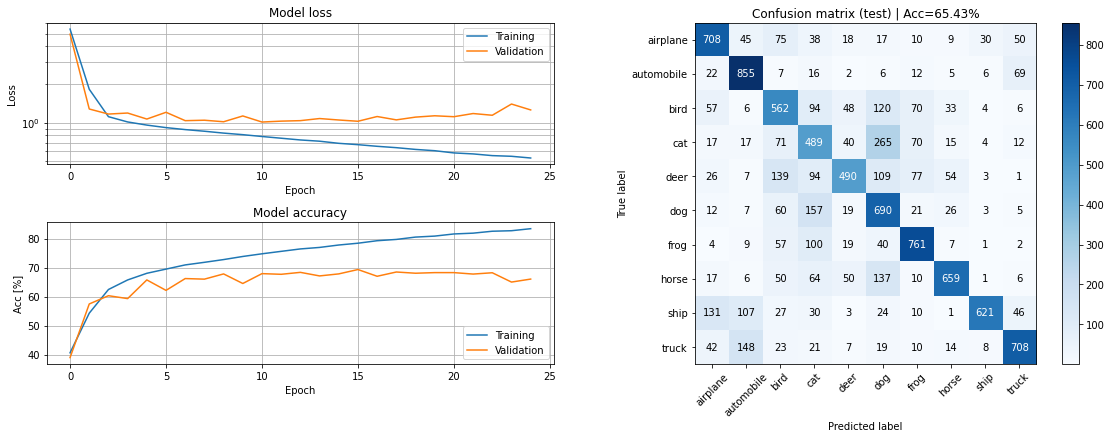

In [ ]:
PlotModelEval(model_simple, history, X_test, y_test, cifar_labels)

### W & B

In [45]:
!pip install wandb
!wandb login "8ecf7403a425fa8a096aeedbe252d23586e2a4cc"

wandb: Appending key for api.wandb.ai to your netrc file: /Users/patrickhiemsch/.netrc


In [10]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [1]:
plt.figure(figsize=(12,4))
for i in range(18):
    idx = np.random.randint(7500)
    label = y_train[idx,0]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(Xtrain[idx])
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

NameError: name 'plt' is not defined

In [11]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=90,
                             width_shift_range=0.1, 
                             height_shift_range=0.1,
                             horizontal_flip=True)
datagen.fit(x_train)

In [12]:
flow = datagen.flow(x_train, y_train, batch_size=9) # Set Batch-size

In [13]:
len(flow.next())# Every object is made from 9 objects then
flow.next()[1]

array([[0],
       [7],
       [9],
       [9],
       [2],
       [5],
       [8],
       [7],
       [4]], dtype=uint8)

In [14]:
cifar_labels[np.argmax(flow.next()[1][0])]

'airplane'

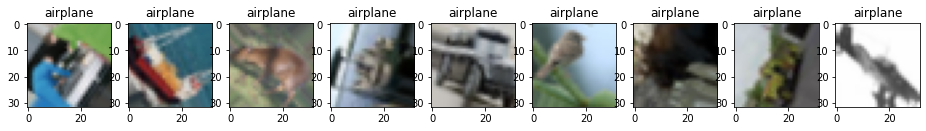

In [15]:
import matplotlib.pyplot as plt
rnd_img_batch = flow.next()

plt.figure(figsize=(16, 64))
for i in range(9):
  plt.subplot(1, 9, i+1)
  image, label = np.rint(rnd_img_batch[0][i]).astype(int), rnd_img_batch[1][i]
  plt.imshow(image)
  plt.title(cifar_labels[np.argmax(label)])

In [16]:
x_train.shape

(50000, 32, 32, 3)

In [27]:
for i in range(6000):
    a = flow.next()

In [17]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [18]:
import numpy as np
from keras.utils import np_utils
#z-score
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)


idx = round(0.2*x_train.shape[0])
x_val, x_train = x_train[:idx, ], x_train[idx:, ]
 
num_classes = 10
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)

y_val, y_train = y_train[:idx, ], y_train[idx:, ]

In [19]:
x_val.shape

(10000, 32, 32, 3)

In [51]:
#### import wandb
from wandb.keras import WandbCallback

# initialize run with hyperparameters 
batch_size = 64
epochs = 20
learning_rate = 0.005


wandb.config = {
  "learning_rate": learning_rate,
  "epochs": epochs,
  "batch_size": batch_size
}

wandb.init(project="my-test-project", 
           entity="patricksvm",
           config=wandb.config,
           name = "CIFAR-10-Run-3")

accuracy,▁▄▅▆▆▇▇▇▇▇▇█████████
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
loss,█▅▄▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
lr,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▂▄▅▆▆▆▆▇▆▇█▇▇█▇████
val_loss,█▇▅▃▃▃▃▃▂▃▂▁▂▂▂▂▁▁▁▁
accuracy,0.80475
best_epoch,16
best_val_loss,0.7331
epoch,19
loss,0.79133


In [52]:
import tensorflow.keras as keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np



num_classes=10
 
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 20:
        lrate = 0.0005
    if epoch > 35: #35 perf
        lrate = 0.0003
    return lrate
 
 
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))


model.add(Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
 

model.add(Flatten())
model.add(Dense(128, activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))
 
model.summary()
 
#data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range = [0.8, 1]
    )
datagen.fit(x_train)

#training
batch_size = 64
flow_train = datagen.flow(x_train, y_train, batch_size=batch_size)


opt_rms = keras.optimizers.RMSprop(lr=learning_rate, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
#model.fit(X_train, y_train_c, epochs=50, batch_size=batch_size,
#                    verbose=1,validation_split=0.2,callbacks=[LearningRateScheduler(lr_schedule)])
history = model.fit(flow_train,
              steps_per_epoch=(x_train.shape[0]) // batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_val, y_val),
              callbacks=[LearningRateScheduler(lr_schedule),
                        WandbCallback()])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_52 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_59 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_53 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_53 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_60 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                     

2022-05-19 14:59:24.143984: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - ETA: 0s - loss: 1.7472 - accuracy: 0.4161

2022-05-19 15:00:24.646178: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 70s 107ms/step - loss: 1.7472 - accuracy: 0.4161 - val_loss: 1.5683 - val_accuracy: 0.5373 - lr: 0.0010 - _timestamp: 1652965232.0000 - _runtime: 75.0000
Epoch 2/20
625/625 [==============================] - 67s 108ms/step - loss: 1.3083 - accuracy: 0.5816 - val_loss: 1.2336 - val_accuracy: 0.6233 - lr: 0.0010 - _timestamp: 1652965299.0000 - _runtime: 142.0000
Epoch 3/20
625/625 [==============================] - 68s 108ms/step - loss: 1.1500 - accuracy: 0.6450 - val_loss: 1.2324 - val_accuracy: 0.6367 - lr: 0.0010 - _timestamp: 1652965367.0000 - _runtime: 210.0000
Epoch 4/20
625/625 [==============================] - 68s 109ms/step - loss: 1.0624 - accuracy: 0.6795 - val_loss: 1.0377 - val_accuracy: 0.6883 - lr: 0.0010 - _timestamp: 1652965435.0000 - _runtime: 278.0000
Epoch 5/20
625/625 [==============================] - 67s 108ms/step - loss: 1.0013 - accuracy: 0.7069 - val_loss: 1.0590 - val_accuracy: 0.6994 - lr: 0.0010 - _timestamp: 1652

In [ ]:
score = model.evaluate(x_test, y_test, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

In [ ]:
! pip install pandas

In [22]:
import pandas as pd
pd.DataFrame(history.history).plot()

ModuleNotFoundError: No module named 'pandas'

In [25]:
import tensorflow.keras as keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np

num_classes=10
 
def lr_schedule(epoch):
    lrate = 0.015
    if epoch > 10:
        lrate = 0.01
    if epoch > 15: #35 perf
        lrate = 0.006
    if epoch > 25:
        lrate = 0.001
    if epoch > 35:
        lrate = 0.0005
    if epoch > 45:
        lrate = 0.0001
    return lrate

weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))
 
model.summary()
 
#data augmentation
datagen = ImageDataGenerator(rotation_range=15,
                             width_shift_range=0.05, 
                             height_shift_range=0.05,
                             horizontal_flip=True,
                             zoom_range=[0.85, 1])
datagen.fit(x_train)

#training
batch_size = 64
flow_train = datagen.flow(x_train, y_train, batch_size=batch_size)

 
 
opt_rms = keras.optimizers.RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
#model.fit(X_train, y_train_c, epochs=50, batch_size=batch_size,
#                    verbose=1,validation_split=0.2,callbacks=[LearningRateScheduler(lr_schedule)])
history = model.fit(flow_train,
              steps_per_epoch=(x_train.shape[0]) // batch_size,
              epochs=50,
              verbose=1,
              validation_data=(x_val, y_val),
              callbacks=[LearningRateScheduler(lr_schedule)])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_22 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_25 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_23 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_23 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_26 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                     

2022-05-18 10:10:00.795999: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


312/312 [==============================] - ETA: 0s - loss: 1.6506 - accuracy: 0.4069

2022-05-18 10:10:39.467177: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


KeyboardInterrupt: 

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_36 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_42 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_37 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_37 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_43 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


625/625 [==============================] - 22s 33ms/step - loss: 2.0119 - accuracy: 0.2831 - val_loss: 3.8354 - val_accuracy: 0.2540
Epoch 2/50
625/625 [==============================] - 20s 32ms/step - loss: 1.6790 - accuracy: 0.4093 - val_loss: 1.6394 - val_accuracy: 0.5043
Epoch 3/50
625/625 [==============================] - 20s 32ms/step - loss: 1.5230 - accuracy: 0.4775 - val_loss: 1.0822 - val_accuracy: 0.6432
Epoch 4/50
625/625 [==============================] - 20s 32ms/step - loss: 1.3944 - accuracy: 0.5264 - val_loss: 1.6083 - val_accuracy: 0.5877
Epoch 5/50
625/625 [==============================] - 20s 32ms/step - loss: 1.3222 - accuracy: 0.5564 - val_loss: 1.6631 - val_accuracy: 0.5814
Epoch 6/50
625/625 [==============================] - 20s 32ms/step - loss: 1.2709 - accuracy: 0.5768 - val_loss: 1.3027 - val_accuracy: 0.6113
Epoch 7/50
625/625 [==============================] - 21s 34ms/step - loss: 1.2080 - accuracy: 0.6011 - val_loss: 1.3258 - val_accuracy: 0.6416
Epo

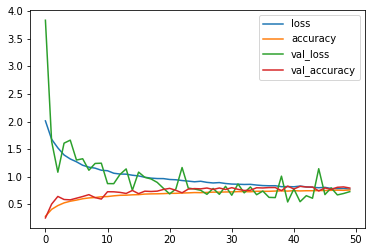

Test loss = 0.774
Test accuracy = 0.784





Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_42 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_49 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_43 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_43 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_50 (Bat  (None, 32, 32, 32)       128       
 chNormal

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


625/625 [==============================] - 22s 32ms/step - loss: 1.6103 - accuracy: 0.4179 - val_loss: 1.3062 - val_accuracy: 0.5458
Epoch 2/50
625/625 [==============================] - 20s 32ms/step - loss: 1.2182 - accuracy: 0.5658 - val_loss: 0.9873 - val_accuracy: 0.6424
Epoch 3/50
625/625 [==============================] - 20s 33ms/step - loss: 1.0571 - accuracy: 0.6300 - val_loss: 0.9224 - val_accuracy: 0.6835
Epoch 4/50
625/625 [==============================] - 20s 32ms/step - loss: 0.9740 - accuracy: 0.6620 - val_loss: 0.8732 - val_accuracy: 0.7007
Epoch 5/50
625/625 [==============================] - 20s 32ms/step - loss: 0.9062 - accuracy: 0.6862 - val_loss: 0.8694 - val_accuracy: 0.7102
Epoch 6/50
625/625 [==============================] - 20s 32ms/step - loss: 0.8676 - accuracy: 0.7023 - val_loss: 0.7726 - val_accuracy: 0.7327
Epoch 7/50
625/625 [==============================] - 20s 32ms/step - loss: 0.8332 - accuracy: 0.7124 - val_loss: 0.8295 - val_accuracy: 0.7244
Epo

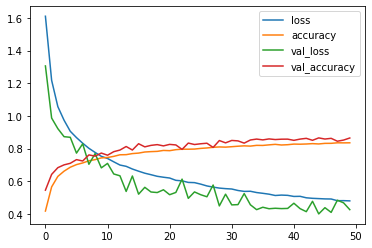

Test loss = 0.457
Test accuracy = 0.855





Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_48 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_56 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_49 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_49 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_57 (Bat  (None, 32, 32, 32)       128       
 chNormal

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


625/625 [==============================] - 21s 32ms/step - loss: 1.5920 - accuracy: 0.4279 - val_loss: 1.3796 - val_accuracy: 0.5424
Epoch 2/50
625/625 [==============================] - 20s 31ms/step - loss: 1.1889 - accuracy: 0.5756 - val_loss: 1.1511 - val_accuracy: 0.6156
Epoch 3/50
625/625 [==============================] - 20s 31ms/step - loss: 1.0309 - accuracy: 0.6385 - val_loss: 1.0550 - val_accuracy: 0.6607
Epoch 4/50
625/625 [==============================] - 20s 32ms/step - loss: 0.9543 - accuracy: 0.6684 - val_loss: 0.8493 - val_accuracy: 0.7122
Epoch 5/50
625/625 [==============================] - 20s 32ms/step - loss: 0.8891 - accuracy: 0.6939 - val_loss: 0.7662 - val_accuracy: 0.7380
Epoch 6/50
625/625 [==============================] - 20s 32ms/step - loss: 0.8485 - accuracy: 0.7072 - val_loss: 0.6960 - val_accuracy: 0.7639
Epoch 7/50
625/625 [==============================] - 20s 31ms/step - loss: 0.8064 - accuracy: 0.7218 - val_loss: 0.7520 - val_accuracy: 0.7568
Epo

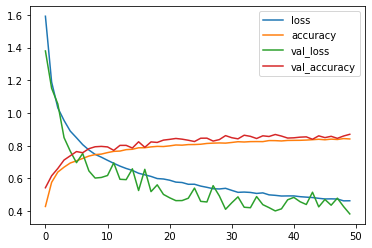

Test loss = 0.418
Test accuracy = 0.864





Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_54 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_63 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_55 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_55 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_64 (Bat  (None, 32, 32, 32)       128       
 chNormal

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


625/625 [==============================] - 24s 35ms/step - loss: 1.6100 - accuracy: 0.4329 - val_loss: 1.5511 - val_accuracy: 0.5284
Epoch 2/50
625/625 [==============================] - 21s 33ms/step - loss: 1.1899 - accuracy: 0.5789 - val_loss: 1.0539 - val_accuracy: 0.6421
Epoch 3/50
625/625 [==============================] - 21s 33ms/step - loss: 1.0279 - accuracy: 0.6418 - val_loss: 1.1031 - val_accuracy: 0.6337
Epoch 4/50
625/625 [==============================] - 20s 32ms/step - loss: 0.9422 - accuracy: 0.6750 - val_loss: 0.7795 - val_accuracy: 0.7316
Epoch 5/50
625/625 [==============================] - 20s 32ms/step - loss: 0.8783 - accuracy: 0.6949 - val_loss: 0.7320 - val_accuracy: 0.7476
Epoch 6/50
625/625 [==============================] - 20s 33ms/step - loss: 0.8282 - accuracy: 0.7117 - val_loss: 0.7278 - val_accuracy: 0.7523
Epoch 7/50
625/625 [==============================] - 20s 33ms/step - loss: 0.7918 - accuracy: 0.7300 - val_loss: 0.6865 - val_accuracy: 0.7666
Epo

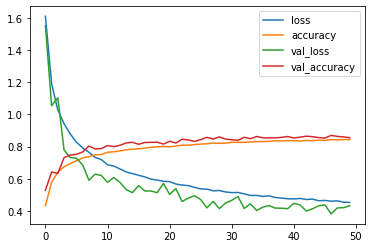

Test loss = 0.458
Test accuracy = 0.850





Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_60 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_70 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_61 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_61 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_71 (Bat  (None, 32, 32, 32)       128       
 chNorma

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


625/625 [==============================] - 23s 34ms/step - loss: 1.9958 - accuracy: 0.3300 - val_loss: 1.5306 - val_accuracy: 0.4655
Epoch 2/50
625/625 [==============================] - 21s 33ms/step - loss: 1.6313 - accuracy: 0.4239 - val_loss: 1.5606 - val_accuracy: 0.4730
Epoch 3/50
625/625 [==============================] - 21s 33ms/step - loss: 1.4916 - accuracy: 0.4748 - val_loss: 1.5071 - val_accuracy: 0.5094
Epoch 4/50
625/625 [==============================] - 21s 33ms/step - loss: 1.3906 - accuracy: 0.5088 - val_loss: 1.4039 - val_accuracy: 0.5337
Epoch 5/50
625/625 [==============================] - 21s 33ms/step - loss: 1.3165 - accuracy: 0.5331 - val_loss: 1.3269 - val_accuracy: 0.5601
Epoch 6/50
625/625 [==============================] - 21s 33ms/step - loss: 1.2444 - accuracy: 0.5616 - val_loss: 1.3178 - val_accuracy: 0.5685
Epoch 7/50
625/625 [==============================] - 21s 33ms/step - loss: 1.1991 - accuracy: 0.5765 - val_loss: 1.2301 - val_accuracy: 0.6000
Epo

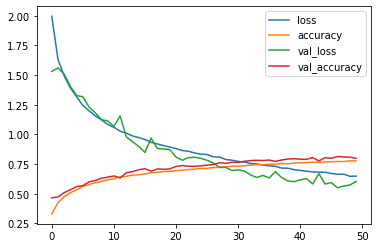

Test loss = 0.635
Test accuracy = 0.789







In [23]:
for lr in [0.1, 0.01, 0.005, 0.001, 0.0001]:


  model = Sequential()
  model.add(Conv2D(32, (3,3), padding='same', input_shape=x_train.shape[1:]))
  model.add(Activation('elu'))
  model.add(BatchNormalization())
  model.add(Conv2D(32, (3,3), padding='same'))
  model.add(Activation('elu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))
  
  model.add(Conv2D(64, (3,3), padding='same'))
  model.add(Activation('elu'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3,3), padding='same'))
  model.add(Activation('elu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))
  
  model.add(Conv2D(128, (3,3), padding='same'))
  model.add(Activation('elu'))
  model.add(BatchNormalization())
  model.add(Conv2D(128, (3,3), padding='same'))
  model.add(Activation('elu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.3))


  model.add(Flatten())
  model.add(Dense(64))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Dense(num_classes, activation='softmax'))
  
  model.summary()
  
  #data augmentation
  datagen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1, 
                              height_shift_range=0.1,
                              horizontal_flip=True)
  datagen.fit(x_train)

  #training
  batch_size = 64
  flow_train = datagen.flow(x_train, y_train, batch_size=batch_size)

  
  
  opt_rms = keras.optimizers.RMSprop(lr=0.01)
  model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(lr=lr), metrics=['accuracy'])
  hist = model.fit(flow_train,
              steps_per_epoch=(x_train.shape[0]) // batch_size,
              epochs=50,
              verbose=1,
              validation_data=(x_val, y_val))
  
  print(f"\n\n\n========== lr: {lr} ==========")
  score = model.evaluate(x_test, y_test, batch_size=128, verbose=0)
  print("\n")
  pd.DataFrame(hist.history).plot()
  plt.show()
  for i in range(len(score)):
      print("Test " + model.metrics_names[i] + " = %.3f" % score[i])
  print("\n\n\n\n")

In [16]:
score = model.evaluate(x_test, y_test, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 0.465
Test accuracy = 0.854


In [9]:
import pandas as pd
pd.DataFrame(history.history).plot()

NameError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls /content/gdrive/My\ Drive/

'Colab Notebooks'
 copy.txt
'Kopie von Gedächtnisprotokoll Telko- und Internetsökonomie WS16 17 .gdoc'
 Patrick_LiU
'Python - ML1'


In [ ]:
model.save("/content/gdrive/My Drive/Colab Notebooks/Models/CIFAR10/simpler_first.h5")

## Resnet-34

In [ ]:
from functools import partial
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, strides=1,
                        padding="SAME", use_bias=False)

class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [ # Main Layer: Conv + BN + ReLu + Conv + BN
            DefaultConv2D(filters, strides=strides), # Conv 3x3 with stride=stride
            keras.layers.BatchNormalization(),
            self.activation,
            Dropout(0.25),
            DefaultConv2D(filters), # Conv 3x3 with stride=1
            keras.layers.BatchNormalization()] 
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                DefaultConv2D(filters, kernel_size=1, strides=strides), # Conv with stride=stride, so in the end same dimensions to concat
                keras.layers.BatchNormalization()]

    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
import datetime
model = keras.models.Sequential()
model.add(DefaultConv2D(64, kernel_size=7, strides=2,
                        input_shape=[32, 32, 3]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="SAME"))
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides=strides))
    prev_filters = filters
model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation="softmax"))

sgd = SGD(learning_rate=0.01, momentum=0.9)

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#%tensorboard --logdir={log_folder}

In [ ]:
history = model.fit(X_train, y_train_c, batch_size=32, epochs=25, verbose=1, validation_split=0.2, callbacks=callbacks)

NameError: ignored

In [ ]:
score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 1.678
Test accuracy = 0.677
